## CMSC320 Final Tutorial

Chocolate Dairy Queen Collaborators: <br>
Charlie Zhang, Darren Chea, Quintin (Baongheim) Nguyen

Which champions are the strongest in their respective role in Season 12 League of Legends Pro Play?

The purpose of our tutorial is to create data visualization of statistics of the Season 12 League of Legends Esports/Pro play, focused on the champions (or characters) played. We aim to see the best performing champions (mainly damage focused) in each respective role.  
The data will be used to make an algorithm to ___ .

League of Legends is the game that brought the competitive gaming scene a lot of popularity and currently boasts one of the highest active player counts while also expanding to multiple different forms of media, maintaining its already high relevance in pop culture. There are constantly a lot of changes to the current trends and strategies in game so we limited to just this current ongoing season to maximize relevance.

Below is a table of statistics of the current season with champion information pulled from professional play.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Data collected from https://gol.gg/champion/list/season-S12/split-ALL/tournament-ALL/
file = "LoL_S12.csv"
table = pd.read_csv(file)

table

,Champion,Role,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Avg Ban Turn,Game Time,CS per min,Damage per min,Gold per min,CSD@15,GD@15,XPD@15
0,Jinx,ADC,2026.0,1043.0,81.0,1066.0,960.0,53%,4.2,4.6,31:45:00,9.6,549.0,449.0,1.5,69,-77
1,Zeri,ADC,599.0,1951.0,68.0,349.0,250.0,58%,5.0,3.7,31:34:00,9.4,568.0,452.0,-0.3,8,38
2,Lee Sin,Jungle,1335.0,1199.0,67.0,688.0,647.0,52%,3.4,4.3,32:00:00,5.4,277.0,341.0,-2.6,3,-42
3,Xin Zhao,Jungle,1440.0,981.0,64.0,718.0,722.0,50%,2.8,5,32:15:00,5.4,304.0,330.0,-1.9,-92,-72
4,Gwen,Top,903.0,1464.0,63.0,467.0,436.0,52%,2.8,5,31:50:00,8.1,472.0,398.0,0.6,-43,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Warwick,NaN,1.0,0.0,0.0,1.0,0.0,100%,2.4,-,26:14:00,5.6,553.0,405.0,23,1880,1078
156,Brand,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-,0:00:00,NaN,NaN,NaN,NaN,NaN,NaN
157,Katarina,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-,0:00:00,NaN,NaN,NaN,NaN,NaN,NaN
158,Rammus,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-,0:00:00,NaN,NaN,NaN,NaN,NaN,NaN


We want data relevant to what we are looking for and this is the offensive value of each champion. CSD@15 stands for creep score difference at 15 minutes, GD@15 stands for gold difference at 15 minutes, XPD@15 stands for experience difference at 15 minutes, and Avg Ban Turn is what turn is that champion typically banned at. All of these are irrelevant towards a champion's offensive value because it only accounts for the first 15 minutes of gameplay and games are on average, two times this amount of time (~30 minutes). Average Ban Turn is also irrelevant as the champion is banned regardless, meaning they will not be played. The other factors such as wins, losses, KDA, presence, role, bans, damage per minute, and gold per minute all provide better insight for a champion's value, each champion has different scaling so if we were to factor early game champions versus late game champions, the data could be skewed. We also wanted to focus on only champions who consistently get picked pro play, so we looked only at champions who's presence in the current season is 5% or above.

In [17]:
del table['CSD@15']
del table['GD@15']
del table['XPD@15']
del table['Avg Ban Turn']

table

,Champion,Role,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Game Time,CS per min,Damage per min,Gold per min
0,Jinx,ADC,2026.0,1043.0,81.0,1066.0,960.0,53%,4.2,31:45:00,9.6,549.0,449.0
1,Zeri,ADC,599.0,1951.0,68.0,349.0,250.0,58%,5.0,31:34:00,9.4,568.0,452.0
2,Lee Sin,Jungle,1335.0,1199.0,67.0,688.0,647.0,52%,3.4,32:00:00,5.4,277.0,341.0
3,Xin Zhao,Jungle,1440.0,981.0,64.0,718.0,722.0,50%,2.8,32:15:00,5.4,304.0,330.0
4,Gwen,Top,903.0,1464.0,63.0,467.0,436.0,52%,2.8,31:50:00,8.1,472.0,398.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Warwick,NaN,1.0,0.0,0.0,1.0,0.0,100%,2.4,26:14:00,5.6,553.0,405.0
156,Brand,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0:00:00,NaN,NaN,NaN
157,Katarina,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0:00:00,NaN,NaN,NaN
158,Rammus,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0:00:00,NaN,NaN,NaN


In [18]:
table = table.query("Presence >= 5")
table

,Champion,Role,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Game Time,CS per min,Damage per min,Gold per min
0,Jinx,ADC,2026.0,1043.0,81.0,1066.0,960.0,53%,4.2,31:45:00,9.6,549.0,449.0
1,Zeri,ADC,599.0,1951.0,68.0,349.0,250.0,58%,5.0,31:34:00,9.4,568.0,452.0
2,Lee Sin,Jungle,1335.0,1199.0,67.0,688.0,647.0,52%,3.4,32:00:00,5.4,277.0,341.0
3,Xin Zhao,Jungle,1440.0,981.0,64.0,718.0,722.0,50%,2.8,32:15:00,5.4,304.0,330.0
4,Gwen,Top,903.0,1464.0,63.0,467.0,436.0,52%,2.8,31:50:00,8.1,472.0,398.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Seraphine,Mid,113.0,127.0,6.0,64.0,49.0,57%,4.8,31:54:00,6.3,345.0,345.0
67,Nidalee,Jungle,82.0,147.0,6.0,40.0,42.0,49%,3.8,32:13:00,6.4,471.0,377.0
68,Fiora,Top,87.0,124.0,6.0,45.0,42.0,52%,2.6,31:05:00,8.2,474.0,405.0
69,Azir,Mid,127.0,82.0,6.0,58.0,69.0,46%,3.1,33:06:00,8.9,570.0,403.0


The role a champion fills is an important factor for how we consider a champion's value, in League of Legends, there are 5 roles: Top lane, Jungle, Mid lane, Attack Damage Carry (ADC), and Support. To better visualize the data we've obtained, we can represent it in the form of a Scatterplot.

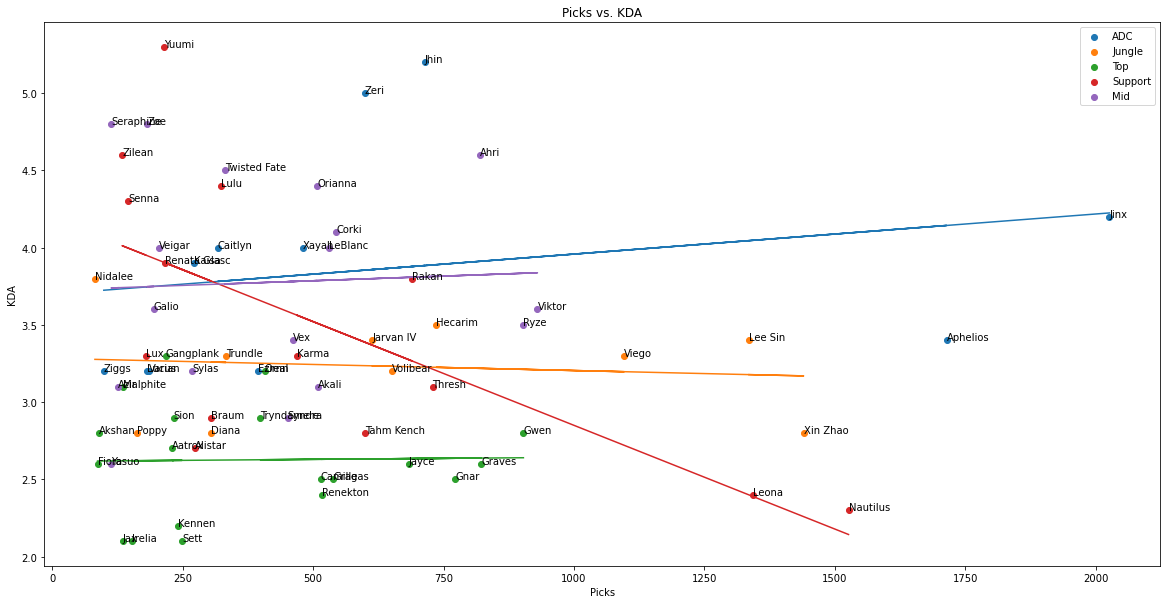

In [19]:
f = plt.figure(0)
f.set_figwidth(20)
f.set_figheight(10)

#labels plot
champions = table['Champion'].unique()
role = table['Role'].unique()
plt.xlabel("Picks")
plt.ylabel("KDA")
plt.title("Picks vs. KDA")

for curr in role:
    curr_role = table.query("Role == '{0}'".format(curr))
    picks = curr_role['Picks']
    kda = curr_role['KDA']
    plt.scatter(picks, kda, label = curr)
    
    m,b = np.polyfit(curr_role['Picks'], curr_role['KDA'],1)
    plt.plot(curr_role['Picks'], m*curr_role['Picks'] + b)
    
for i, text in enumerate(champions):
    plt.annotate(text, (table['Picks'][i], table['KDA'][i]))
                 
plt.legend()

The graph above represents the champion kill-death-assist (KDA) ratio vs amount of times they were picked. Each role is represented by their prospective color indicated in the legend, and this is to help differentiate and better locate the high performing roles. The regression lines represent the expected KDA based on the data on the champion role.

Based on the regression lines, we can see that the support role, which typically plays a less damage involved role has a lower KDA average as the champion is picked more. In professional play, the support is either an enchanter who primarily buffs (aka empower) the team or a tank who primarily engages fights and have a lot of armor, magic resistance, and health. We can see that Nautilus and Leona are tank supports that are heavily picked but have really low KDA averages and this might be due to the fact that supports that engage typically die very often which will lower their KDAs. We also see outliers such as Yuumi in the support role, she has the highest KDA average, but a lower pick rate.  

We can also see based on the regression lines that Attack Damage Carries (ADC) and Mid laners are the roles that have high pick rates and high KDA averages. 

<AxesSubplot:xlabel='Role', ylabel='KDA'>

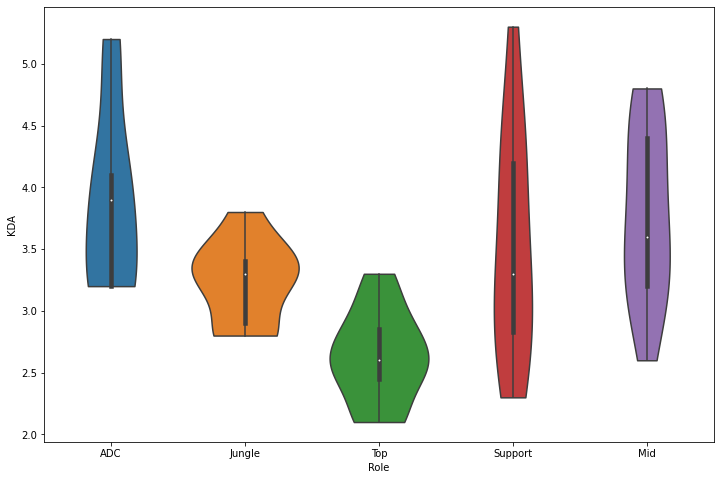

In [20]:
import seaborn as sb

# Standard Deviation of KDAs per Role
plt.subplots(figsize = (12,8))

sb.violinplot(x = table["Role"], y = table["KDA"], cut = 0)

Our scatterplot was able to show us some general trends regarding the data and with the violin plot above, we can determine the density measures of data as a distribution. The KDA distribution per role is better represented in the above violin plot. Yuumi's role as a support as well as her high KDA average stretches the violin plot and the KDA averages in the support role appear to vary based on the champion.

Because we are focusing mainly on damage dealing champions, we can eliminate the Support role so that we can isolate the champions with the highest damage per minute. 

In [21]:
relevant_roles = ['Top', 'Mid', 'ADC', 'Jungle']
table = table.loc[table['Role'].isin(relevant_roles)]

table

,Champion,Role,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Game Time,CS per min,Damage per min,Gold per min
0,Jinx,ADC,2026.0,1043.0,81.0,1066.0,960.0,53%,4.2,31:45:00,9.6,549.0,449.0
1,Zeri,ADC,599.0,1951.0,68.0,349.0,250.0,58%,5.0,31:34:00,9.4,568.0,452.0
2,Lee Sin,Jungle,1335.0,1199.0,67.0,688.0,647.0,52%,3.4,32:00:00,5.4,277.0,341.0
3,Xin Zhao,Jungle,1440.0,981.0,64.0,718.0,722.0,50%,2.8,32:15:00,5.4,304.0,330.0
4,Gwen,Top,903.0,1464.0,63.0,467.0,436.0,52%,2.8,31:50:00,8.1,472.0,398.0
5,Aphelios,ADC,1714.0,546.0,60.0,842.0,872.0,49%,3.4,32:06:00,9.1,508.0,433.0
7,Ryze,Mid,902.0,1122.0,54.0,409.0,493.0,45%,3.5,31:29:00,9.0,406.0,406.0
9,LeBlanc,Mid,531.0,1275.0,48.0,251.0,280.0,47%,4.0,32:07:00,7.8,521.0,382.0
10,Caitlyn,ADC,317.0,1421.0,46.0,165.0,152.0,52%,4.0,32:56:00,9.1,515.0,440.0
11,Jayce,Top,683.0,1036.0,46.0,351.0,332.0,51%,2.6,32:03:00,8.5,658.0,417.0
